# 1. 回归测试

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression, make_classification

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR, SVC

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score, make_scorer

from pyExtremeLearningMachine import ExtremeLearninMachineRegression, ExtremeLearninMachineClassifier

## 1.1. 单输出回归测试

### 1.1.1 构建数据集

In [2]:
# create datasets
X, y = make_regression(n_samples=10000, n_features=10, n_informative=5, n_targets=1, random_state=42)
# 归一化
X = (X - X.min(axis=0)) / X.ptp(axis=0)
y = (y - y.min()) / y.ptp()
print(X.shape, y.shape)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10000, 10) (10000,)
(7000, 10) (7000,) (3000, 10) (3000,)


### 1.1.2 对比模型设置

In [3]:
models = {
    'mlp' : MLPRegressor(),
    'lr'  : LinearRegression(),
    'svr' : SVR(),
    'elm' : ExtremeLearninMachineRegression()
}

for name, model in models.items():
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    print('name: {0}, MAPE:{1}, MSE:{2}, MAE:{3}'.format(
        name, mean_absolute_error(test_y, pred), mean_absolute_error(test_y, pred), mean_absolute_error(test_y, pred)
    ))

name: mlp, MAPE:0.004021547847425404, MSE:0.004021547847425404, MAE:0.004021547847425404
name: lr, MAPE:9.603209431367313e-16, MSE:9.603209431367313e-16, MAE:9.603209431367313e-16
name: svr, MAPE:0.025185690366518562, MSE:0.025185690366518562, MAE:0.025185690366518562
name: elm, MAPE:0.034427785271175425, MSE:0.034427785271175425, MAE:0.034427785271175425


## 1.2. 多输出回归测试

### 1.2.1 构建数据集

In [4]:
# create datasets
X, y = make_regression(n_samples=10000, n_features=10, n_informative=5, n_targets=3, random_state=42)
# 归一化
X = (X - X.min(axis=0)) / X.ptp(axis=0)
y = (y - y.min(axis=0)) / y.ptp(axis=0)
print(X.shape, y.shape)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10000, 10) (10000, 3)
(7000, 10) (7000, 3) (3000, 10) (3000, 3)


### 1.2.2 对比模型设置

In [5]:
models = {
    'mlp' : MLPRegressor(),
    'lr'  : LinearRegression(),
    'elm' : ExtremeLearninMachineRegression(hidden_unit=50)
}

for name, model in models.items():
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    print('name: {0}, MAPE:{1}, MSE:{2}, MAE:{3}'.format(
        name, 
        mean_absolute_error(test_y, pred, multioutput='raw_values'), 
        mean_absolute_error(test_y, pred, multioutput='raw_values'),
        mean_absolute_error(test_y, pred, multioutput='raw_values'),
    ))

name: mlp, MAPE:[0.00296457 0.00348049 0.00422369], MSE:[0.00296457 0.00348049 0.00422369], MAE:[0.00296457 0.00348049 0.00422369]
name: lr, MAPE:[1.46636869e-15 8.71740469e-16 1.60997835e-15], MSE:[1.46636869e-15 8.71740469e-16 1.60997835e-15], MAE:[1.46636869e-15 8.71740469e-16 1.60997835e-15]
name: elm, MAPE:[0.01129687 0.01169623 0.01150385], MSE:[0.01129687 0.01169623 0.01150385], MAE:[0.01129687 0.01169623 0.01150385]


# 2. 多分测试

### 2.1. 构建数据集

In [6]:
# create datasets
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_classes=5, random_state=42)
# 归一化
X = (X - X.min(axis=0)) / X.ptp(axis=0)
print(X.shape, y.shape)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10000, 10) (10000,)
(7000, 10) (7000,) (3000, 10) (3000,)


### 2.2 对比模型设置

In [7]:
models = {
    'mlp' : MLPClassifier(),
    'svr' : SVC(),
    'elm' : ExtremeLearninMachineClassifier(hidden_unit=50)
}

for name, model in models.items():
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    print('name: {0}, ACC:{1}, F1:{2}'.format(
        name, accuracy_score(test_y, pred), f1_score(test_y, pred, average='macro')
    ))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


name: mlp, ACC:0.713, F1:0.7120009104980298
name: svr, ACC:0.7576666666666667, F1:0.7560130620757232
name: elm, ACC:0.6233333333333333, F1:0.6182932285111661


# 3. ELM 调差

In [8]:
# create datasets
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_classes=5, random_state=42)
# 归一化
X = (X - X.min(axis=0)) / X.ptp(axis=0)
print(X.shape, y.shape)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


gs = GridSearchCV(
    estimator  = ExtremeLearninMachineClassifier(),
    param_grid = {
        'hidden_unit': np.arange(5, 105, 5),
        'regularization_factor': np.logspace(-5, 5, 11)
    },
    scoring    = 'f1_macro', 
    cv         = StratifiedKFold(),
)

gs.fit(train_X, train_y)

results = pd.DataFrame(gs.cv_results_)
results = results[['param_hidden_unit', 'param_regularization_factor', 'mean_test_score']]

(10000, 10) (10000,)
(7000, 10) (7000,) (3000, 10) (3000,)


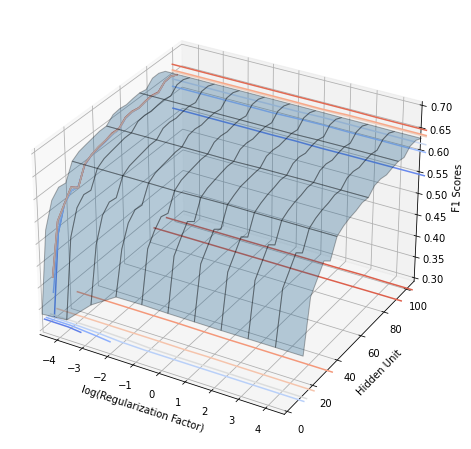

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


def get_z(x, y, results):
    z = np.zeros_like(x, dtype=float)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            index = np.logical_and((results['param_hidden_unit'] == y[i, j]).values, (results['param_regularization_factor'] == x[i, j]).values)
            z[i, j] = results['mean_test_score'][index].values
    return z


x = results['param_regularization_factor'].unique()
x_log = np.log10(list(x))
# print(x_log)
y_ = results['param_hidden_unit'].unique()
x, y     = np.meshgrid(x, y_)
x_log, _ = np.meshgrid(x_log, y_)

z = get_z(x, y, results)


ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')
# Plot the 3D surface
ax.plot_surface(x_log, y, z, rstride=5, cstride=1, alpha=0.3, edgecolor='black')

# ax.xaxis._set_scale('log')

cset = ax.contour(x_log, y, z, zdir='z', offset=0.3, cmap=cm.coolwarm)
cset = ax.contour(x_log, y, z, zdir='x', offset=-4.5, cmap=cm.coolwarm)
cset = ax.contour(x_log, y, z, zdir='y', offset=105, cmap=cm.coolwarm)

ax.set_xlim([-4.5, 4.5])
ax.set_ylim([0, 105])
ax.set_zlim([0.3, 0.7])

ax.set_xlabel('log(Regularization Factor)')
ax.set_ylabel('Hidden Unit')
ax.set_zlabel('F1 Scores')

plt.show()